# Explore the Wine Dataset

In [4]:
import pandas as pd

read the red wine data
display the varibles

In [18]:
redWine = pd.read_csv('wineQualityData/winequality-red.csv',sep=';')
redWine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


display the number of observations

In [15]:
redWine.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [19]:
whiteWine = pd.read_csv('wineQualityData/winequality-white.csv',sep=';')
whiteWine.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [20]:
whiteWine.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
dtype: int64

So as you can see both datas have 11 variables and one output which is quality

I will work on the red data for now because it has less data, I don't want to make my computer tired of computations in ht elearning stage.

After I get familiar with the operations I will use the white wine data because more data means better training.

Let's check the general statistical information about out data

In [21]:
redWine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


The mean of the quality is 5.6, as it's suggested I will define
    the wine with quality score that is below 5.6 as badWine
    and the wine with quality score that is above 5.6 as goodWine

In [112]:
#First I want to seperate the quality from other variables.
redWineQuality = (redWine['quality'].values)
X = redWine.iloc[:,0:-1].values

In [116]:
# Define the output as false and true.
# We already know the average of the quality is 5.6
# So anything below 5.6 is bad wine and anything above 5.6 is good wine
y = (redWineQuality > 5.6)

In [117]:
#Then I'll seperate the data into training and test data sets.
#70% for training, 30% for testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [137]:
count(X_train)

NameError: name 'count' is not defined

In [118]:
# A function to extract a specific column from the data
def column(matrix, i):
    return [row[i] for row in matrix]

In [121]:
# The following library will help me to get the main statistical information about an array
from scipy import stats

fixedAcidity = column(X_train, 0)
stats.describe(fixedAcidity)

DescribeResult(nobs=1119L, minmax=(4.7000000000000002, 15.9), mean=8.340661304736372, variance=3.0343469683671689, skewness=0.9697935459761903, kurtosis=1.075004834979187)

In [139]:
pd.DataFrame(X_train).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,8.340661,1.741938,4.70000,7.1000,7.90000,9.300000,15.90000
1,1119.0,0.530420,0.185445,0.12000,0.3900,0.52000,0.640000,1.58000
2,1119.0,0.272082,0.194883,0.00000,0.0900,0.26000,0.420000,1.00000
3,1119.0,2.555273,1.494441,0.90000,1.9000,2.20000,2.600000,15.50000
4,1119.0,0.087685,0.049581,0.01200,0.0700,0.07900,0.090000,0.61100
5,1119.0,16.248436,10.745321,1.00000,8.0000,14.00000,22.000000,72.00000
6,1119.0,47.447721,34.263477,6.00000,22.0000,38.00000,63.000000,289.00000
7,1119.0,0.996755,0.001900,0.99007,0.9956,0.99672,0.997860,1.00369
8,1119.0,3.308963,0.155127,2.74000,3.2100,3.31000,3.400000,4.01000
9,1119.0,0.660545,0.178737,0.37000,0.5500,0.62000,0.730000,2.00000


And just out of curiosity I'll plot a few variables and see how they change versus the quality.

In [42]:
import numpy as np

trainingDataLengthArray = np.arange(0, len(redWineQualityTrain))
trainingDataLengthArray

array([   0,    1,    2, ..., 1116, 1117, 1118])

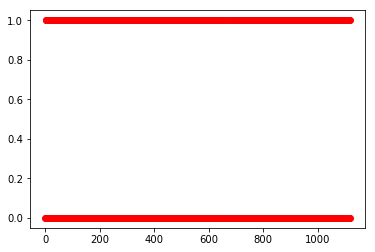

In [125]:
import matplotlib.pyplot as plt

plt.plot(trainingDataLengthArray, y_train, 'ro')
plt.show()

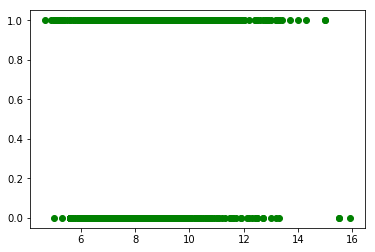

In [127]:
plt.plot(fixedAcidity, y_train, 'go', hold=True)
plt.show()

# Regressions

Normalize X data for the training set

In [128]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,4.986082e-15,1.000447,-2.090941,-0.712549,-0.253085,0.550977,4.341555
1,1119.0,1.683491e-15,1.000447,-2.214153,-0.757544,-0.056214,0.591167,5.662322
2,1119.0,-2.752490e-16,1.000447,-1.396757,-0.934734,-0.062025,0.759348,3.736827
3,1119.0,-9.928757e-16,1.000447,-1.108115,-0.438669,-0.237836,0.029943,8.665794
4,1119.0,6.378648e-15,1.000447,-1.527181,-0.356857,-0.175255,0.046703,10.559442
5,1119.0,1.353301e-16,1.000447,-1.419711,-0.767974,-0.209341,0.535501,5.190770
6,1119.0,-2.381175e-18,1.000447,-1.210217,-0.743039,-0.275861,0.454105,7.052999
7,1119.0,-8.783000e-13,1.000447,-3.520329,-0.608117,-0.018302,0.582045,3.652243
8,1119.0,-4.716265e-15,1.000447,-3.669365,-0.638236,0.006686,0.587115,4.521134
9,1119.0,4.262899e-15,1.000447,-1.626274,-0.618757,-0.226944,0.388761,7.497358


In [144]:
# Linear regression
from sklearn.linear_model import LinearRegression
slr = LinearRegression ()
slr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % slr.score(X_test, y_test))
print('slope: %.3f' % slr.coef_[0])

Test Accuracy: 0.298
slope: 0.019


Linear regression have a very bad score, 0.30. We can only guess 30% of the test data correctly.
Let's have a look at our linear regression model and the data.
We'll see why a linear model is a bad estimator.

In [150]:
# plot regression model vs data

In [133]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression ()
logReg.fit(X_train, y_train)
print('Test Accuracy: %.3f' % logReg.score(X_test, y_test))

Test Accuracy: 0.742


Now we get an accuracy of 74%. Way better than the linear model.
But still, it's not very good. We can try other 